# To predict whether a person will get stroke or not 

### Importing libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [205]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [206]:
df.shape

(5110, 12)

In [207]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Preprocessing

In [209]:
# check if any null value is present
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Missing values imputation

In [210]:
df.bmi.describe()       

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

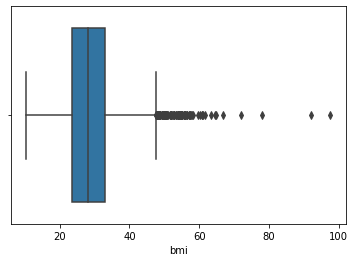

In [211]:
sns.boxplot(df['bmi'])

(array([4.66683794e-04, 2.98677628e-03, 1.15737581e-02, 2.33341897e-02,
        3.08944672e-02, 3.94814490e-02, 5.42286569e-02, 5.87088213e-02,
        5.73087699e-02, 4.70417264e-02, 3.73347035e-02, 2.71609968e-02,
        1.92273723e-02, 1.53072284e-02, 1.09204008e-02, 8.21363477e-03,
        3.45346008e-03, 2.80010276e-03, 1.96007193e-03, 1.58672490e-03,
        2.05340869e-03, 8.40030829e-04, 1.86673518e-04, 3.73347035e-04,
        2.80010276e-04, 9.33367588e-05, 0.00000000e+00, 0.00000000e+00,
        9.33367588e-05, 0.00000000e+00, 0.00000000e+00, 9.33367588e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.33367588e-05, 0.00000000e+00, 9.33367588e-05]),
 array([10.3   , 12.4825, 14.665 , 16.8475, 19.03  , 21.2125, 23.395 ,
        25.5775, 27.76  , 29.9425, 32.125 , 34.3075, 36.49  , 38.6725,
        40.855 , 43.0375, 45.22  , 47.4025, 49.585 , 51.7675, 53.95  ,
        56.1325, 58.315 , 60.4975, 62.68  , 64.8625, 67.045 , 69.

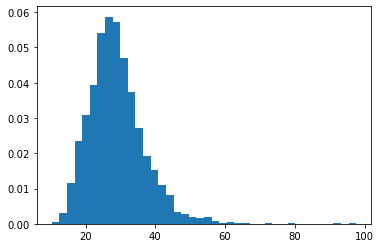

In [212]:
plt.hist(df['bmi'] , bins = 40 , density = True )

In [213]:
### using median to fill missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [214]:
df = df.drop('id' , axis = 1)

In [215]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [216]:
df.groupby(['stroke' , 'Residence_type']).size()

stroke  Residence_type
0       Rural             2400
        Urban             2461
1       Rural              114
        Urban              135
dtype: int64

In [217]:
df.groupby(['stroke' , 'ever_married']).size()

stroke  ever_married
0       No              1728
        Yes             3133
1       No                29
        Yes              220
dtype: int64

In [218]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [219]:
df.groupby(['stroke' , 'work_type']).size()

stroke  work_type    
0       Govt_job          624
        Never_worked       22
        Private          2776
        Self-employed     754
        children          685
1       Govt_job           33
        Private           149
        Self-employed      65
        children            2
dtype: int64

In [220]:
df.groupby(['stroke' , 'smoking_status']).size()

stroke  smoking_status 
0       Unknown            1497
        formerly smoked     815
        never smoked       1802
        smokes              747
1       Unknown              47
        formerly smoked      70
        never smoked         90
        smokes               42
dtype: int64

In [221]:
df.groupby(['stroke']).count()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4861,4861,4861,4861
1,249,249,249,249,249,249,249,249,249,249


In [222]:
df.groupby(['stroke']).mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,41.971545,0.088871,0.047110,104.795513,28.799115
1,67.728193,0.265060,0.188755,132.544739,30.090361


### People with average age  of 42 doesn't have stroke 
### People having stroke are high age group i.e., above 60

### No  outliers because it's a classification problem 

### Exploratory Data Analysis

In [223]:
## checking the distribution of numerical variables for people who has diabetes

In [224]:
num_cols = ['age' , 'avg_glucose_level' , 'bmi']

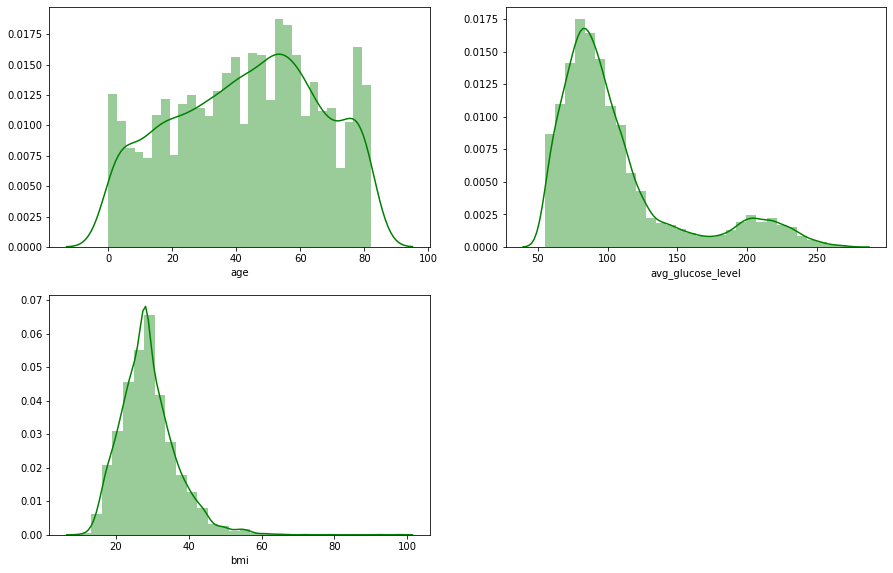

In [225]:
plt.figure(figsize=(15,15))
plotnumber = 1
for numerical_feature in num_cols:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df[numerical_feature] , bins =30 , label = 'Yes' , color = 'green' )
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [226]:
## Pair plot

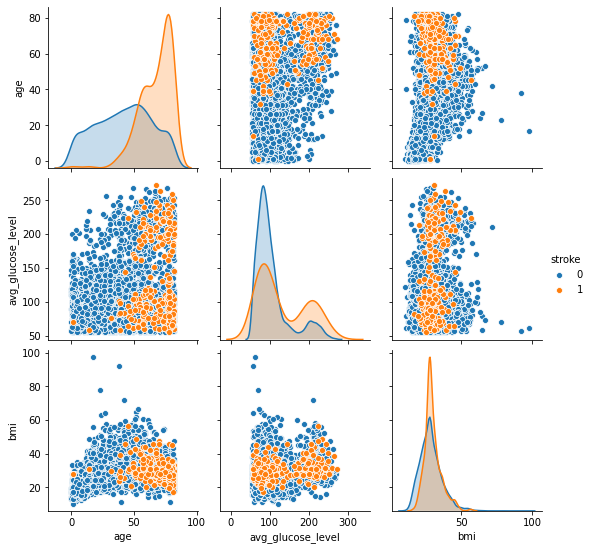

In [227]:
sns.pairplot(df,hue='stroke',vars=['age' ,'avg_glucose_level' , 'bmi'])

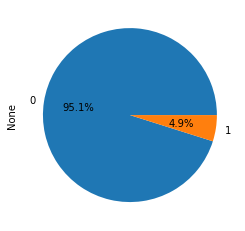

In [228]:
df.groupby('stroke').size().plot(kind='pie', autopct='%.1f%%')

In [229]:
## It is an imbalanced dataset

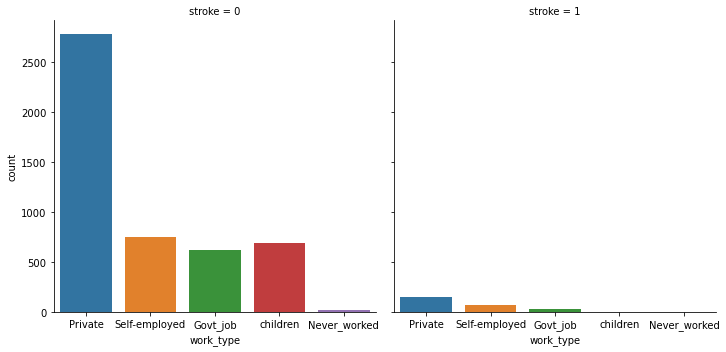

In [230]:
sns.catplot(x='work_type' ,col= 'stroke' , kind= 'count' , data = df)

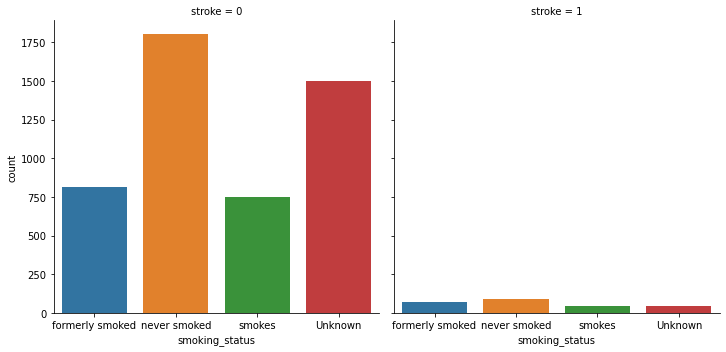

In [231]:
sns.catplot(x='smoking_status' ,col= 'stroke' , kind= 'count' , data = df)

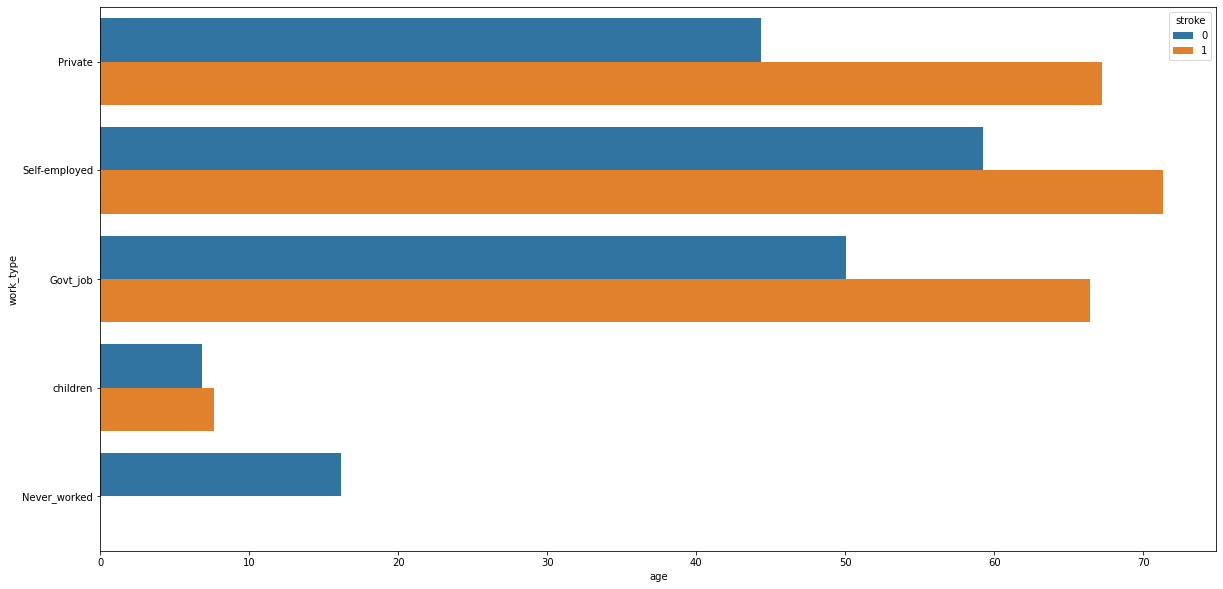

In [232]:
plt.figure(figsize = ( 20,10))
sns.barplot(x= 'age' , y= 'work_type' , hue='stroke' , data = df , ci = None)

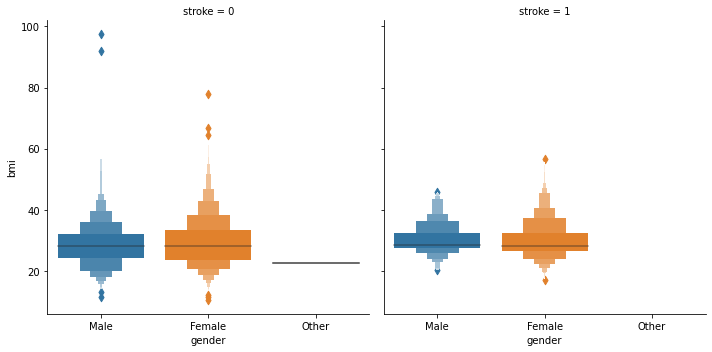

In [233]:
sns.catplot(x='gender' ,y='bmi',col= 'stroke' , kind= 'boxen' , data = df)

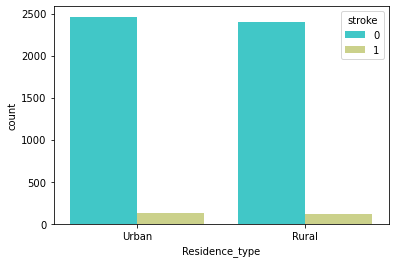

In [234]:
sns.countplot(x='Residence_type',hue= 'stroke',data=df , palette = 'rainbow')

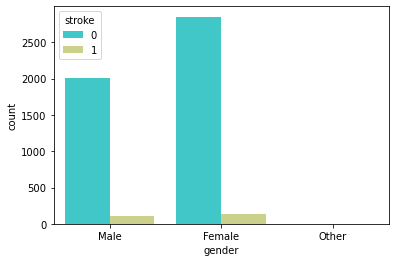

In [235]:
sns.countplot(x='gender',hue= 'stroke',data=df , palette = 'rainbow')

## Correlation plot

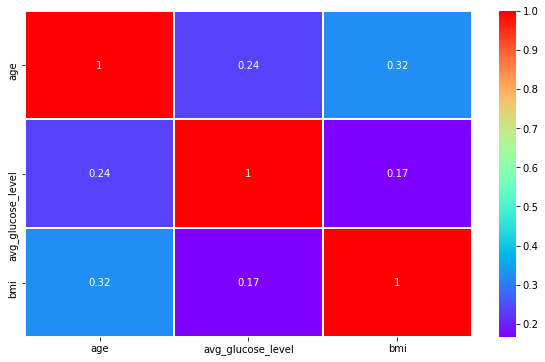

In [236]:
plt.figure(figsize = (10 ,6))
sns.heatmap(df[num_cols].corr(), annot = True , cmap = 'rainbow',linecolor='white',linewidths=1)

In [237]:
df[num_cols].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.324296
avg_glucose_level,0.238171,1.000000,0.166876
bmi,0.324296,0.166876,1.000000


In [238]:
### here the numerical variables are not having correlation among themselves

# Feature Engineering

### Label encoding 

In [239]:
df = df.replace({ 'gender': {'Male':1 , 'Female':0 , 'Other':2 } ,'ever_married' : {'Yes':1 , 'No':0} , 'Residence_type':{'Urban':1 , 'Rural':0} 
                 , 'work_type':{'Private':0 , 'Self-employed':1  , 'Govt_job':2 , 'children':3 , 'Never_worked':4 }
                ,'smoking_status' :{'formerly smoked':2 , 'smokes':3 , 'never smoked':1 , 'Unknown':0}})

In [240]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,61.0,0,0,1,1,0,202.21,28.1,1,1
2,1,80.0,0,1,1,0,0,105.92,32.5,1,1
3,0,49.0,0,0,1,0,1,171.23,34.4,3,1
4,0,79.0,1,0,1,1,0,174.12,24.0,1,1


# Scaling using MinMaxScaler

In [241]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
df[['age' ,'avg_glucose_level','bmi' ]] = sclr.fit_transform(df[['age' ,'avg_glucose_level','bmi' ]])

In [242]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,0,1,0.801265,0.301260,2,1
1,0,0.743652,0,0,1,1,0,0.679023,0.203895,1,1
2,1,0.975586,0,1,1,0,0,0.234512,0.254296,1,1
3,0,0.597168,0,0,1,0,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,1,0,0.549349,0.156930,1,1


### TRAIN TEST SPLIT

In [243]:
x = df.drop('stroke' , axis = 1)
y = df['stroke']

In [244]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Resampling using SMOTETomek

In [247]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.50)
x_res,y_res=os.fit_sample(x_train,y_train)
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 3404, 1: 173})
Resampled dataset shape Counter({0: 3356, 1: 1654})


## Model Building

## RandomForestClassifier with hyperparameter optimization

In [251]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [253]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

### fit the randomized model

rf_randomcv.fit(x_res,y_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [255]:
random_forest_model = rf_randomcv.best_estimator_

In [256]:
predict_train_data = random_forest_model.predict(x_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.892


Text(0.5, 15.0, 'predicted label')

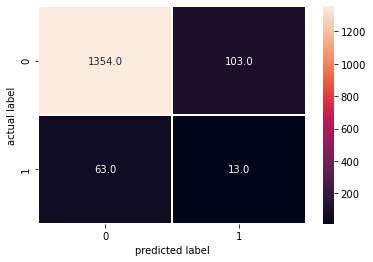

In [257]:
sns.heatmap(metrics.confusion_matrix(y_test , predict_train_data ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Hyper Parameter Optimization with xgboost

In [258]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [259]:
import xgboost

In [260]:
classifier=xgboost.XGBClassifier()

In [261]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [262]:
random_search.fit(x_res,y_res.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.1s finished


[16:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [264]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [265]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [266]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_test,y_test.ravel(),cv=10)

[16:50:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:50:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [267]:
score

array([0.92207792, 0.94805195, 0.94155844, 0.94117647, 0.94771242,
       0.94771242, 0.95424837, 0.96078431, 0.94771242, 0.95424837])

In [268]:
score.mean()

0.9465283082930143

Text(0.5, 15.0, 'predicted label')

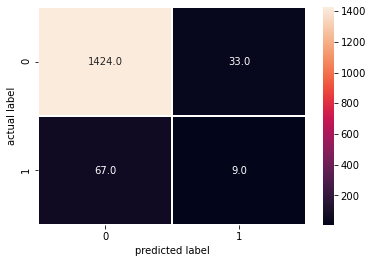

In [269]:
sns.heatmap(metrics.confusion_matrix(y_test , random_search.predict(x_test) ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Logistic Regression

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid = {"C":np.logspace(-3,3,7), "penalty":["l2"]}

In [271]:
logreg     = LogisticRegression()
logreg_cv  = GridSearchCV(logreg,grid,cv=10)

logreg_cv.fit(x_res,y_res)
print("\ntuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("\naccuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}

accuracy : 0.7874251497005987


Text(0.5, 15.0, 'predicted label')

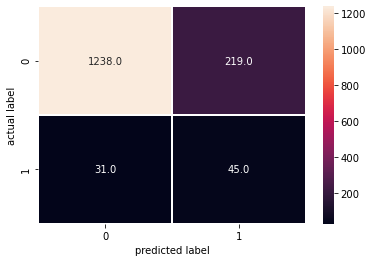

In [272]:
sns.heatmap(metrics.confusion_matrix(y_test , logreg_cv.predict(x_test) ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

# LGBM

In [273]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_res , y_res)

LGBMClassifier()

In [275]:
y_pred = lgbm.predict(x_test)
print('accuracy_score is :{}'.format(metrics.accuracy_score(y_test , y_pred)))
print('\nroc_auc_score is :{}'.format(metrics.roc_auc_score(y_test,y_pred)))

print('precision_score is :{}'.format(metrics.precision_score(y_test,y_pred)))
print('recall_score is :{}'.format(metrics.recall_score(y_test,y_pred)))
print('f1_score is :{}'.format(metrics.f1_score(y_test,y_pred)))

print('\n' ,metrics.classification_report(y_test,y_pred))

accuracy_score is :0.9210697977821265

roc_auc_score is :0.5344435212946573
precision_score is :0.13114754098360656
recall_score is :0.10526315789473684
f1_score is :0.11678832116788322

               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1457
           1       0.13      0.11      0.12        76

    accuracy                           0.92      1533
   macro avg       0.54      0.53      0.54      1533
weighted avg       0.91      0.92      0.92      1533



Text(0.5, 15.0, 'predicted label')

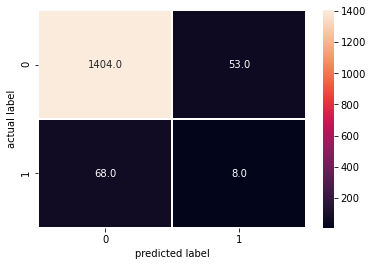

In [276]:
sns.heatmap(metrics.confusion_matrix(y_test , y_pred ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Conclusion

### XGBoost performs well in reducing the False positive and False Negative values when compared to other algorithms
